# Optics calculation and matching for a large ring (LHC) - part 2 

In [1]:
%matplotlib widget

In [2]:
import xtrack as xt

import numpy as np
import matplotlib.pyplot as plt

### Load LHC model

In [3]:
collider = xt.Multiline.from_json(
    "../../xtrack/test_data/hllhc15_thick/hllhc15_collider_thick.json")
collider.build_trackers()
collider.vars.load_madx_optics_file(
    "../../xtrack/test_data/hllhc15_thick/opt_round_150_1500.madx")

Loading line from dict:   0%|          | 0/30281 [00:00<?, ?it/s]

Done loading line from dict.           


Loading line from dict:   0%|          | 0/30289 [00:00<?, ?it/s]

Done loading line from dict.           
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.


### Prepare for optics matching: set limits and steps for all circuits

In [4]:
import lhc_match as lm
lm.set_var_limits_and_steps(collider)

## Large rematch in a single python function (B1 & B2)

In [5]:
optimizers = lm.change_beta15(collider, 
                 betx_ip1_target=0.15, bety_ip1_target=0.10,
                 betx_ip5_target=0.10, bety_ip5_target=0.15)

Found suitable prebuilt kernel `only_xtrack_frozen_energy`.
Found suitable prebuilt kernel `only_xtrack_frozen_energy`.
Found suitable prebuilt kernel `only_xtrack_backtrack_frozen_energy`.
Found suitable prebuilt kernel `only_xtrack_backtrack_frozen_energy`.
Step 1/3
Matching betx_ip1=0.15 bety_ip1=0.13333333333333333 betx_ip5=0.13333333333333333 bety_ip5=0.15
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching IR2 b1
Matching: model call n. 88               

Matching IR3 b1
Matching: model call n. 19               

Matching IR4 b1
Matching: model call n. 101               

Matching IP6 b1
Matching: model call n. 68               

Matching IP7 b1
Matching: model call n. 1               

Matching IP8 b1
Matching: model call n. 88               

Step 2/3
Matching betx_ip1=0.15 bety_ip1=0.11666666666666667 betx_

In [6]:
# Count number of modified circuits
n_circuits = 0
for bb in ['b1', 'b2']:
    for irn in ['ir2', 'ir4', 'ir6', 'ir8']:
        n_circuits += len(optimizers[bb][irn].vary)
print('N. modified circuits:', n_circuits)

N. modified circuits: 146


#### Inspect result

In [7]:
twb1 = collider.lhcb1.twiss()
twb2 = collider.lhcb2.twiss()

print('B1:')
twb1.rows['ip.*'].cols['betx bety mux muy x y'].show(digits=4)
print()
print('B2:')
twb2.rows['ip.*'].cols['betx bety mux muy x y'].show(digits=4)

B1:
name                      betx  bety   mux   muy          x          y
ip1                       0.15   0.1     0     0          0          0
ip2                         10    10 8.242 7.693 -1.402e-17  4.853e-35
ip3                      121.6 218.6 15.95 15.45  4.199e-16 -2.444e-34
ip4                      236.2 306.2  23.5 22.43  9.365e-17 -3.161e-34
ip5                        0.1  0.15 30.93 29.99   6.59e-18   4.76e-36
ip6                      320.1 181.8 38.75  37.4  8.948e-16 -2.811e-34
ip7                      120.8 149.4 46.35 44.59 -4.147e-16  2.365e-35
ip8                        1.5   1.5 54.34 52.26 -5.816e-17 -1.311e-33
ip1.l1                    0.15   0.1 62.31 60.32 -1.639e-17  1.414e-33

B2:
name                      betx  bety   mux   muy          x          y
ip1                       0.15   0.1     0     0  -1.24e-17 -3.852e-34
ip2                         10    10 7.685 8.284  -9.83e-17  1.584e-33
ip3                      121.6 218.6 15.85 15.51 -1.164e-16  1.801e-

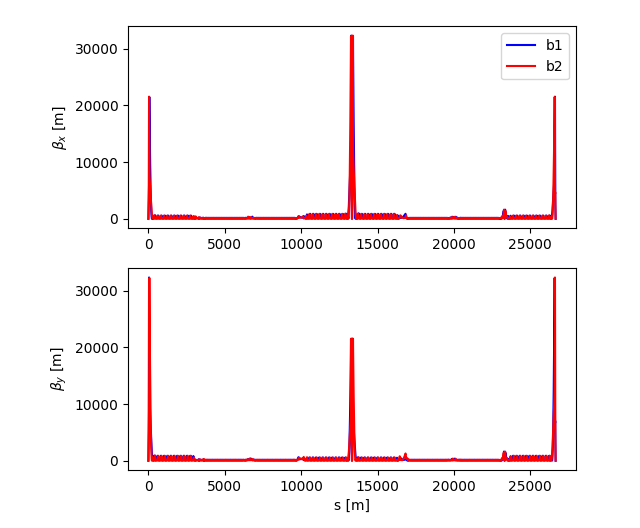

In [8]:
plt.figure(figsize=(6.4, 4.8*1.1))
ax1 = plt.subplot(2,1,1)
ax1.plot(twb1.s, twb1.betx, color='blue', label='b1')
ax1.plot(twb2.s, twb2.betx, color='red', label='b2')
plt.ylabel(r'$\beta_x$ [m]')
plt.legend()

ax2 = plt.subplot(2,1,2)
ax2.plot(twb1.s, twb1.bety, color='blue', label='b1')
ax2.plot(twb2.s, twb2.bety, color='red', label='b1')
plt.ylabel(r'$\beta_y$ [m]')
plt.xlabel('s [m]')

plt.subplots_adjust(left=0.2, top=.95)

### Rematch IR orbit knobs

As we have changed the IR quads we need to rematch all the IR orbit knobs (crossing angles, separations, offsets, etc.)

In [9]:
optimizers_ip_knobs = lm.match_orbit_knobs_ip2_ip8(collider)

Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching: model call n. 20               

Generated knob:  on_o2v
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching: model call n. 10               

Generated knob:  on_o2h
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching: model call n. 20               

Generated knob:  on_o8v
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching: model call n. 30               

Generated knob:  on_o8h
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching: model call n. 10               

Generated knob:  on_a2h
Found suitable prebuilt kernel `default_only_xtrack`.
Found suitable prebuilt kernel `default_only_xtrack`.
Matching: model c

In [10]:
print('Generated knobs:', list(optimizers_ip_knobs.keys()))

Generated knobs: ['on_o2h', 'on_o2v', 'on_o8h', 'on_o8v', 'on_a2h', 'on_a2v', 'on_a8h', 'on_a8v', 'on_x2h', 'on_x2v', 'on_x8h', 'on_x8v', 'on_sep2h', 'on_sep2v', 'on_sep8h', 'on_sep8v']


#### Inspect one crossing knob

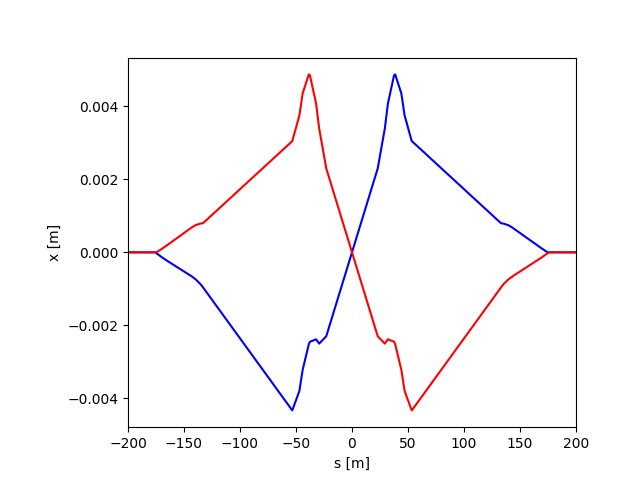

In [11]:
collider.vars['on_x8h'] = 100 
tw = collider.twiss()
plt.figure()
plt.plot(tw.lhcb1.s - tw.lhcb1['s', 'ip8'], tw.lhcb1.x, 'b')
plt.plot(tw.lhcb2.s - tw.lhcb2['s', 'ip8'], tw.lhcb2.x, 'r')
plt.xlim(-200, 200)
plt.xlabel('s [m]')
plt.ylabel('x [m]')
plt.subplots_adjust(left=.2)

# MAD-NG interface

### Get MAD-NG model from Xsuite
We can easily generate the corresponding MAD-NG model ([pymadng](https://pymadng.readthedocs.io/en/latest/) used under the hood)

In [12]:
mng = collider.lhcb1.to_madng(sequence_name='lhcb1')

### Use MAD-NG TPSA to compute octupolar RDTs

In [13]:
mng.send('''
    local damap in MAD
    local lhc = MADX.lhcb1
    
    -- list of octupolar RDTs
    local rdts = {"f4000", "f3100", "f2020", "f1120"}
    
    -- create phase-space damap at 4th order
    local X0 = damap {nv=6, mo=4}
    
    -- twiss with RDTs
    local mtbl = twiss {sequence=lhc, X0=X0, trkrdt=rdts, info=2, saverdt=true}
    
    -- send columns to Python
    py:send({mtbl.s, mtbl.beta22, mtbl.f4000, mtbl.f3100, mtbl.f2020, mtbl.f1120})

''')

s, beta22, f4000, f3100, f2020, f1120 = mng.recv()

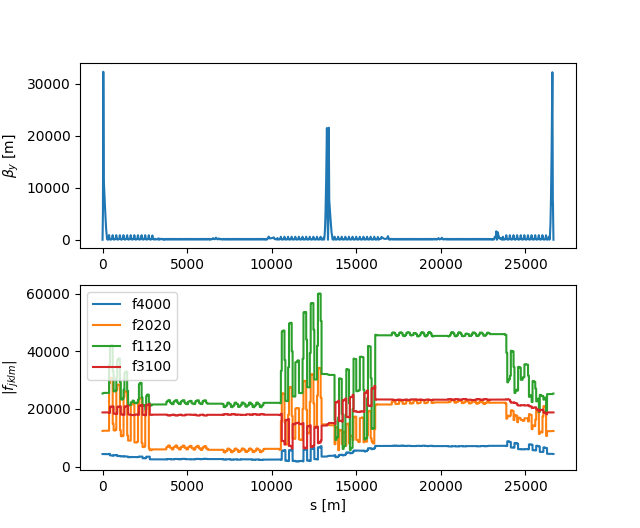

In [14]:
plt.figure(figsize=(6.4, 4.8*1.1))
ax1 = plt.subplot(2,1,1)
ax1.plot(s, beta22)
plt.ylabel(r'$\beta_y$ [m]')

ax2 = plt.subplot(2,1,2)
plt.plot(s, np.abs(f4000), label='f4000')
plt.plot(s, np.abs(f2020), label='f2020')
plt.plot(s, np.abs(f1120), label='f1120')
plt.plot(s, np.abs(f3100), label='f3100')
plt.xlabel('s [m]')
plt.ylabel(r'|$f_{jklm}$|')
plt.legend()